#Introduction
Suport vertor machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression, and even outlier detection.

The fundamental idea behind Support Vector Machines is to fit the widest possible “street” between the classes. In other words, the goal is to have the largest possible margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street). Another key idea is to use kernels when training on nonlinear datasets.


In this post, we will train an SVM model using the Iris dataset. Afterwards, we will plot its SVM planes to visualize how the algorithm works.

### Reference:
Géron, A. (2019). Hands-on machine learning with Scikit-Learn. Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems, 1

https://www.kaggle.com/code/xingewang/the-math-behind-linear-svc-classifier


# The Iris Dataset
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

###Reference:
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

# Code

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, model_selection, metrics
import numpy as np

In [3]:
iris = datasets.load_iris()

In order to have a better visualization, we will work with the first two rows of the data set.

In [22]:
coords_to_choose = [1,2]
X = iris.data[:, coords_to_choose]
y = iris.target


We create and traien the SVM clasifier

In [23]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y)
my_svm = svm.SVC(kernel='linear')
my_svm.fit(X_train,y_train)
y_predicted = my_svm.predict(X_train)

In [24]:
y_predicted

array([2, 1, 2, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0,
       2, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 1, 0,
       0, 2])

Let's check the accuracy of the predicted values.

In [25]:
accuracy_train = metrics.accuracy_score(y_train, y_predicted)
print("Accuracy on training set:", accuracy_train)

Accuracy on training set: 0.9553571428571429


In [26]:
# Predict on the test set
y_predicted_test = my_svm.predict(X_test)

# Calculate the accuracy of the predictions on the test set
accuracy_test = metrics.accuracy_score(y_test, y_predicted_test)
print("Accuracy on test set:", accuracy_test)

Accuracy on test set: 0.9736842105263158


Samples are data points allocate in the P-dimension space, each axis represents one feature. The idea of the Support Vector Classifier is to find the "hyperplane" to separate samples into 2 classes in this P-dimension space. In a 2-D space, when we only have 2 features, SVC is to find the straight line that can separate samples.

Now,will display the support vectors as points on a 2D plane with the respective SVM planes.

In [27]:
support_vectors = my_svm.support_vectors_


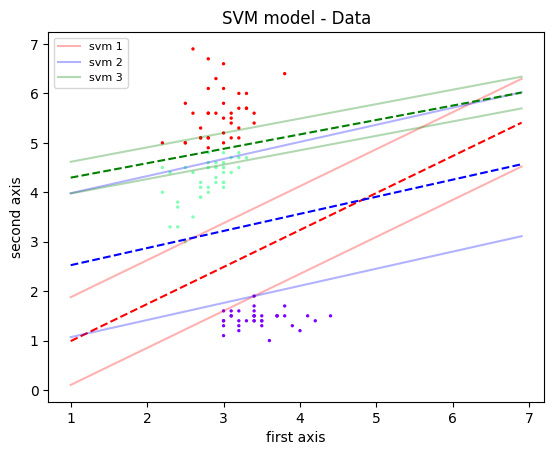

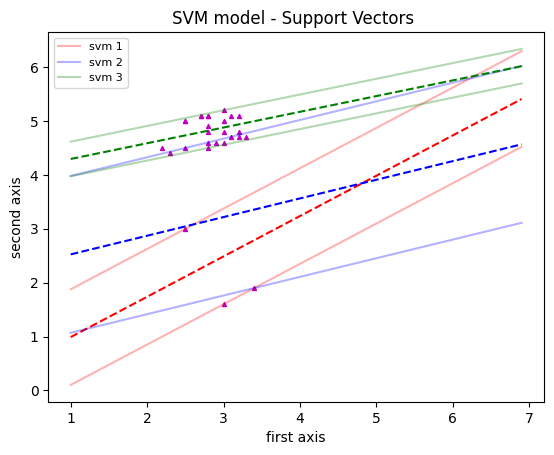

In [30]:
def change_representation_of_line(A,B,C):
#function to get coeficients "a" and "b" of the equation y_axis = a*x_axis + b (suitable for plotting) from the line equation Ax+By+C=0  .
    a = -A/B
    b = -C/B
    a = a.reshape(-1,1) #reshape to has all the numbers in a column instaed of a string
    b = b.reshape(-1,1)
    return a,b

def plot_svm_planes():
#function to plot the SMV planes

    # Extracting coefficients and intercept from the SVM model
    A = my_svm.coef_[:,0]
    B = my_svm.coef_[:,1]
    C = my_svm.intercept_

    # Getting representations of lines for SVM planes
    a,b = change_representation_of_line(A,B,C)
    a,b_up_margin = change_representation_of_line(A,B,C+1)
    a,b_down_margin = change_representation_of_line(A,B,C-1)

    # Generating x and y values for plotting lines
    x_axis = np.linspace(np.min(X_train),np.max(X_train),100)
    y_axis = a*x_axis + b
    y_up = a*x_axis + b_up_margin
    y_down = a*x_axis + b_down_margin

    # Plotting
    colors = ['r','b','g']
    for i in range(3):
        plt.plot(x_axis,y_axis[i],'--',color=colors[i])
        plt.plot(x_axis,y_up[i],color=colors[i],label='svm {}'.format(i+1),alpha=0.3)
        plt.plot(x_axis,y_down[i],color=colors[i],alpha=0.3)

    plt.xlabel('first axis')
    plt.ylabel('second axis')
    plt.legend(loc='best',fontsize=8)

#Plotting SVM Planes with Data Points
plot_svm_planes()
plt.scatter(X_train[:,0],X_train[:,1],s=2,c=y_predicted,cmap='rainbow')
plt.title('SVM model - Data')
plt.show()

#Plotting SVM Planes with Support Vectors
plot_svm_planes()
plt.scatter(support_vectors[:,0],support_vectors[:,1],marker='^',c='m',s=8,label='support vectors')
plt.title('SVM model - Support Vectors ')
plt.show()
